In [49]:
import skvideo.io
import skvideo.motion
import skvideo.datasets

from PIL import Image
import numpy as np
from time import time

In [76]:
videodata = skvideo.io.vread("./bigbuckbunny.mp4")

In [78]:
med = ["ES", "3SS", "N3SS", "SE3SS", "4SS", "ARPS", "DS"]
for m in med:
    s = time()
    motion = skvideo.motion.blockMotion(videodata,method=m)
    print(m, time()-s)
    print(videodata.shape)
    print(motion.shape)

ES 512.3830373287201
(132, 720, 1280, 3)
(131, 90, 160, 2)
3SS 207.07607197761536
(132, 720, 1280, 3)
(131, 90, 160, 2)
N3SS 376.73182821273804
(132, 720, 1280, 3)
(131, 90, 160, 2)
SE3SS 129.94138598442078
(132, 720, 1280, 3)
(131, 90, 160, 2)
4SS 397.42982745170593
(132, 720, 1280, 3)
(131, 90, 160, 2)
ARPS 204.97492289543152
(132, 720, 1280, 3)
(131, 90, 160, 2)
DS 198.89117288589478
(132, 720, 1280, 3)
(131, 90, 160, 2)


In [4]:
skvideo.io.vwrite("bigbuckbunny.mp4", videodata)

In [8]:
from matplotlib import pyplot as plt

In [13]:
motion_sample = Image.open("./data/eval_mv/silent_cif_0002_after_flow_x_0001.jpg")

In [19]:
target_motion = np.array(motion_sample)

In [20]:
target_motion.shape

(288, 352)

In [40]:
bs = 8
# Size of the picture
image_size = (motion.shape[1]*bs, motion.shape[2]*bs)
# Size of the whole vidimage_sizelection represented in matrix
video_shape = (motion.shape[0]+1, image_size[0], image_size[1])

In [42]:
x_motion = np.zeros(video_shape)
y_motion = np.zeros(video_shape)
s = time()
for f in range(video_shape[0]-1):  # We only want the motion starting from frame 1
    for i in range(motion.shape[1]):  # height of motion
        for j in range(motion.shape[2]):  # width of motion
            start_i = i*bs
            end_i = (i+1)*bs
            start_j = j*bs
            end_j = (j+1)*bs
            y_motion[f+1, start_i:end_i, start_j:end_j] = motion[f, i, j, 0]  # The first element is y
            x_motion[f+1, start_i:end_i, start_j:end_j] = motion[f, i, j, 1]  # The second element is x
print(time()-s)  # 81 seconds for sync each pixel; 3 seconds for sync per block

3.1076345443725586


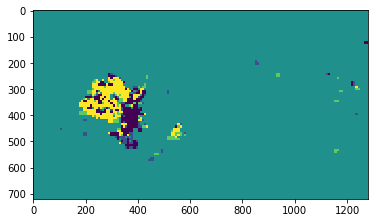

In [43]:
plt.imshow(x_motion[1])

1.2308363914489746


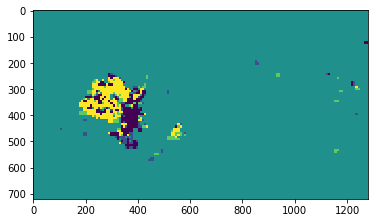

In [67]:
x_motion = np.zeros(video_shape)
y_motion = np.zeros(video_shape)
s = time()
for f in range(video_shape[0]-1):  # We only want the motion starting from frame 1
    x_motion[f+1,:,:] = motion[f, :, :, 1].repeat(bs, axis=0).repeat(bs, axis=1)
    y_motion[f+1,:,:] = motion[f, :, :, 0].repeat(bs, axis=0).repeat(bs, axis=1)
print(time()-s)
plt.imshow(x_motion[1])

In [68]:
# https://stackoverflow.com/questions/32846846/quick-way-to-upsample-numpy-array-by-nearest-neighbor-tiling
from numpy.lib.stride_tricks import as_strided

def tile_array(a, b0, b1):
    r, c = a.shape                                    # number of rows/columns
    rs, cs = a.strides                                # row/column strides 
    x = as_strided(a, (r, b0, c, b1), (rs, 0, cs, 0)) # view a as larger 4D array
    return x.reshape(r*b0, c*b1)  

0.5952291488647461


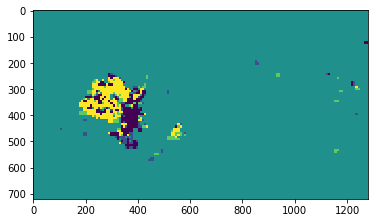

In [69]:
x_motion = np.zeros(video_shape)
y_motion = np.zeros(video_shape)
s = time()
for f in range(video_shape[0]-1):  # We only want the motion starting from frame 1
    x_motion[f+1,:,:] = tile_array(motion[f, :, :, 1], bs, bs)
    y_motion[f+1,:,:] = tile_array(motion[f, :, :, 0], bs, bs)
print(time()-s)
plt.imshow(x_motion[1])

In [82]:
a = Image.open("/home/will/cv/video-compression/vcii/pytorch-vcii/data/train_mv/rgbsHTWwiKU_000003_000013_0002_before_flow_x_0001.jpg")

In [87]:
print(x_motion[1,300, 300])

2.0
